# Car Price Prediction

### This is an ML model designed to predict the car prices as per its features and offerings.

#### Let's start our analysis by exploring our dataset(EDA).
###### Note: We haven't used car's brand as feature here, as our goal here is to only predict the car's price wrt its common features which every brand shares. However, the brand name could also be used for the same by extracting it either in Excel via Delimited or in Jupyter notebook itself.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/ashti/CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
print("shape of our dataset is:", df.shape)

shape of our dataset is: (205, 26)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

##### We have 16 numerical columns and 10 categorical/object columns

In [6]:
df.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car_ID,205.0,NaN,NaN,NaN,103.0,59.322565,1.0,52.0,103.0,154.0,205.0
symboling,205.0,NaN,NaN,NaN,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
CarName,205,147,toyota corona,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fueltype,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doornumber,205,2,four,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carbody,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drivewheel,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginelocation,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,205.0,NaN,NaN,NaN,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9


In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There are no null entries in our data.

In [8]:
# since car_ID seems to be the primary key here, hence, its best to check the duplicity in its reference

In [9]:
df.car_ID.duplicated().unique()

array([False])

Dropping the columns which seem to be irrelevant

In [10]:
df=df.drop(['car_ID', 'symboling', 'CarName'], axis=1)

In [11]:
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Feature Plots

<AxesSubplot:ylabel='aspiration'>

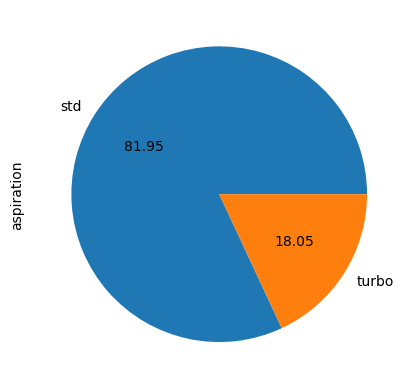

In [13]:
df['aspiration'].value_counts().plot(kind='pie', autopct= '%.2f',)

<AxesSubplot:xlabel='aspiration', ylabel='price'>

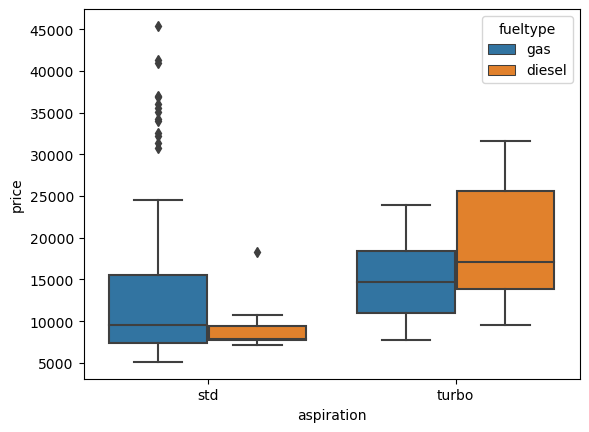

In [14]:
sns.boxplot(df.aspiration, df.price, hue=df.fueltype)

This shows that turbo charged Engine cars are more expensive than standardly aspirated. Also, fueltype seems to have a similar relation as well

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

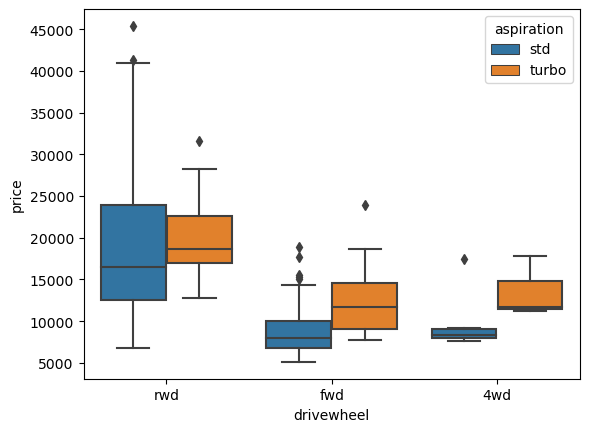

In [15]:
sns.boxplot(df.drivewheel, df.price, hue=df.aspiration)

The Boxplot above shows that rear wheel drive cars are the most expensive followed by 4WD and then followed by Fwd cars.

<AxesSubplot:xlabel='drivewheel', ylabel='horsepower'>

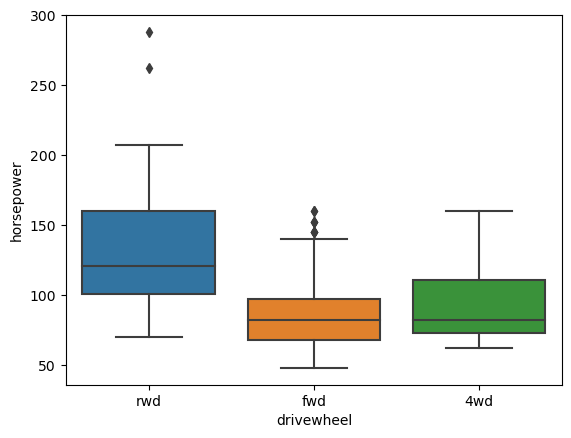

In [16]:
sns.boxplot(df.drivewheel, df.horsepower)

This relation goes hand in hand with Price of a car, As Most powerful cars are RWD which are most expensive as well, then
followed by 4WD and at last fwd.

<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

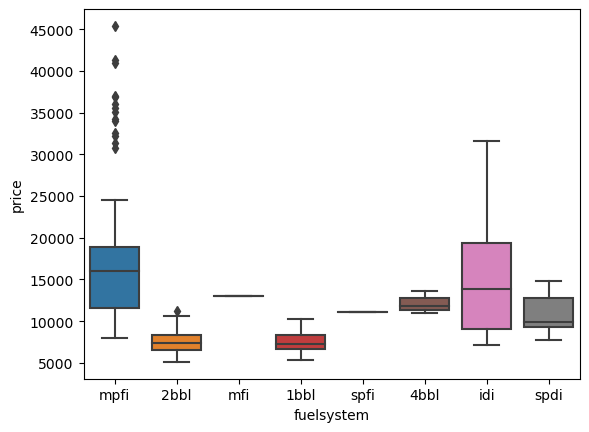

In [17]:
sns.boxplot(df.fuelsystem, df.price)

<AxesSubplot:xlabel='price'>

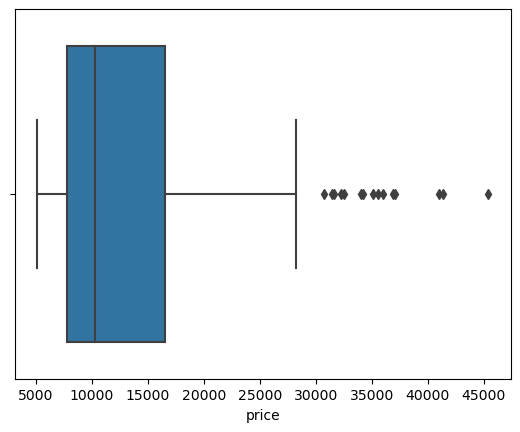

In [18]:
sns.boxplot(df.price)

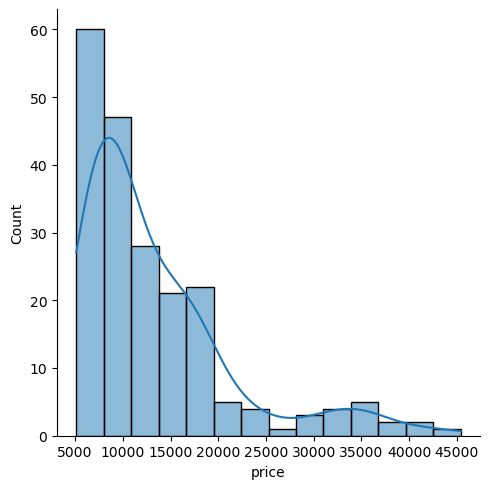

In [19]:
sns.displot(df, x='price', kde=True)
plt.show()

###### our target variable is right skewed and consists of outliers

Now either we can use an Algorithm like decision tree which itself handles the outliers or we can remove outliers ourselves but it will lead to deletion of our data, as of now let's move forward without deleting the outliers from the data.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

<Figure size 800x600 with 0 Axes>

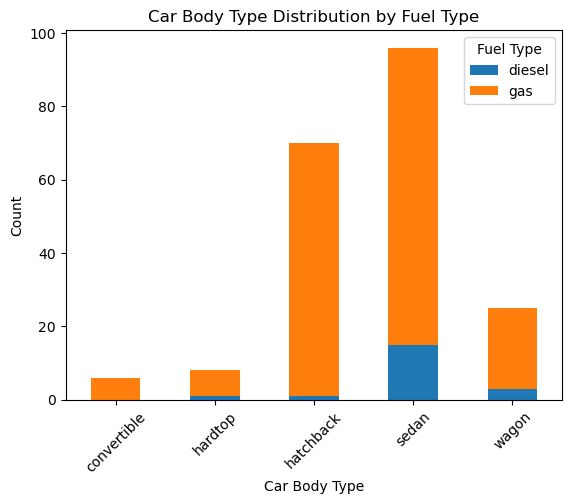

In [21]:
ct = pd.crosstab(df['carbody'], df['fueltype'])

# Create a stacked bar graph
plt.figure(figsize=(8, 6))
ct.plot(kind='bar', stacked=True)
plt.title('Car Body Type Distribution by Fuel Type')
plt.xlabel('Car Body Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type')
plt.show()

###### Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [23]:
df.aspiration=LE.fit_transform(df.aspiration)
df.doornumber=LE.fit_transform(df.doornumber)
df.carbody=LE.fit_transform(df.carbody)
df.drivewheel=LE.fit_transform(df.drivewheel)
df.enginelocation=LE.fit_transform(df.enginelocation)
df.fuelsystem=LE.fit_transform(df.fuelsystem)
df.enginetype=LE.fit_transform(df.enginetype)
df.cylindernumber=LE.fit_transform(df.cylindernumber)
df.fueltype=LE.fit_transform(df.fueltype)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    int32  
 1   aspiration        205 non-null    int32  
 2   doornumber        205 non-null    int32  
 3   carbody           205 non-null    int32  
 4   drivewheel        205 non-null    int32  
 5   enginelocation    205 non-null    int32  
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    int32  
 12  cylindernumber    205 non-null    int32  
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    int32  
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X=df.iloc[:,:22]

In [29]:
X.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,0,1,2,2,0,94.5,171.2,65.5,52.4,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,1,0,0,3,1,0,99.8,176.6,66.2,54.3,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,1,0,0,3,0,0,99.4,176.6,66.4,54.3,...,1,136,5,3.19,3.40,8.0,115,5500,18,22


In [30]:
y=df.iloc[:,-1]

In [31]:
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [32]:
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
from dmba import regressionSummary, adjusted_r2_score

In [34]:
y_pred=lr.predict(X_test)

In [35]:
regressionSummary(y_test, y_pred)


Regression statistics

                      Mean Error (ME) : 563.5050
       Root Mean Squared Error (RMSE) : 3990.8832
            Mean Absolute Error (MAE) : 2543.8679
          Mean Percentage Error (MPE) : 4.1093
Mean Absolute Percentage Error (MAPE) : 22.5092


In [36]:
adjusted_r2_score(y_test, y_pred, lr)

0.5516612528982774

In [37]:
y_pred_tr=lr.predict(X_train)

In [38]:
regressionSummary(y_train, y_pred_tr)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 2488.6895
            Mean Absolute Error (MAE) : 1868.0795
          Mean Percentage Error (MPE) : -1.9156
Mean Absolute Percentage Error (MAPE) : 14.6694


In [39]:
adjusted_r2_score(y_train, y_pred_tr, lr)

0.8799428459591008

#### Here in the Linear Regression model, we can see that this is a clear case of Overfitting, this could be due to various factors, like similar features, Outliers etc. Now, to counter this problem one of the best methods would be to go for Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
dtr=DecisionTreeRegressor(random_state=42)

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
params={'max_depth': [1,3,5,7,9,10,12,14,16,18,20,22,23,24,25,30,35, None]}

In [44]:
grid=GridSearchCV(dtr,param_grid=params)

In [45]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 10, 12, 14, 16, 18, 20,
                                       22, 23, 24, 25, 30, 35, None]})

In [46]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=5, random_state=42)

In [47]:
dtr_2=DecisionTreeRegressor(max_depth=5, random_state=42)

In [48]:
dtr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [49]:
y_pred=dtr_2.predict(X_test)

In [50]:
regressionSummary(y_test,y_pred)


Regression statistics

                      Mean Error (ME) : -812.0249
       Root Mean Squared Error (RMSE) : 2992.9343
            Mean Absolute Error (MAE) : 2135.1175
          Mean Percentage Error (MPE) : -4.1359
Mean Absolute Percentage Error (MAPE) : 14.3609


In [51]:
grid.best_score_

0.8074410867153976

In [52]:
y_pred_tr=dtr_2.predict(X_train)

In [53]:
regressionSummary(y_train,y_pred_tr)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1437.8056
            Mean Absolute Error (MAE) : 987.9310
          Mean Percentage Error (MPE) : -1.1912
Mean Absolute Percentage Error (MAPE) : 8.1783


In [54]:
params_1={
    "max_depth":np.arange(2,100,dtype=int)}

In [55]:
grid_1=GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=params_1, cv=10, n_jobs=-1)

In [56]:
grid_1.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [57]:
grid_1.best_estimator_

DecisionTreeRegressor(max_depth=13, random_state=42)

In [58]:
dtr_3=DecisionTreeRegressor(max_depth=13, random_state=42)

In [59]:
dtr_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=13, random_state=42)

In [60]:
y_pred_tr=dtr_3.predict(X_train)

In [61]:
regressionSummary(y_test, y_pred)


Regression statistics

                      Mean Error (ME) : -812.0249
       Root Mean Squared Error (RMSE) : 2992.9343
            Mean Absolute Error (MAE) : 2135.1175
          Mean Percentage Error (MPE) : -4.1359
Mean Absolute Percentage Error (MAPE) : 14.3609


In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(y_test, y_pred)

0.8865315490866762

In [65]:
r2_score(y_train,y_pred_tr)

0.99865066908237

#### Again, our model seems to Overfit and showing Low Bias High Variance. Now, our motive is to make our model less variable. Hence, its better to try a model like Bagging Regressor.

In [66]:
from sklearn.ensemble import BaggingRegressor

In [67]:
bag_regressor=BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=13, random_state=42), random_state=42)

In [68]:
bag_regressor.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=13, random_state=42),
                 random_state=42)

In [69]:
y_pred=bag_regressor.predict(X_test)

In [70]:
regressionSummary(y_test, y_pred)


Regression statistics

                      Mean Error (ME) : -133.0919
       Root Mean Squared Error (RMSE) : 2019.0975
            Mean Absolute Error (MAE) : 1407.3122
          Mean Percentage Error (MPE) : -2.2062
Mean Absolute Percentage Error (MAPE) : 10.5137


In [71]:
y_preds_tr=bag_regressor.predict(X_train)

In [72]:
regressionSummary(y_train, y_preds_tr)


Regression statistics

                      Mean Error (ME) : -24.6508
       Root Mean Squared Error (RMSE) : 1095.1557
            Mean Absolute Error (MAE) : 700.4099
          Mean Percentage Error (MPE) : -1.3113
Mean Absolute Percentage Error (MAPE) : 5.1252


In [73]:
bag_regressor.score(X_train,y_train)

0.9798891757974181

In [74]:
bag_regressor.score(X_test,y_test)

0.9483589181485566

In [75]:
params_1= {'n_estimators': [5,10,15,20,25,30],
          'max_samples': [0.3,0.4,0.5,0.6,0.7,1.0],
          'max_features': [0.3,0.4,0.5,0.7,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

In [76]:
bagging_regressor_grid=GridSearchCV(BaggingRegressor(estimator=dtr_3, n_jobs=-1), param_grid=params_1, cv=3, n_jobs=-1, verbose=1)

In [77]:
bagging_regressor_grid.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


GridSearchCV(cv=3,
             estimator=BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=13,
                                                                        random_state=42),
                                        n_jobs=-1),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.3, 0.4, 0.5, 0.7, 1.0],
                         'max_samples': [0.3, 0.4, 0.5, 0.6, 0.7, 1.0],
                         'n_estimators': [5, 10, 15, 20, 25, 30]},
             verbose=1)

In [78]:
print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)

Train R^2 Score : 0.992
Test R^2 Score : 0.902
Best R^2 Score Through Grid Search : 0.910
Best Parameters :  {'bootstrap': False, 'bootstrap_features': True, 'max_features': 0.3, 'max_samples': 1.0, 'n_estimators': 15}


In [80]:
r2_score(y_test, y_pred)

0.9483589181485566

In [81]:
r2_score(y_train, y_preds_tr)

0.9798891757974181

After performing the Bagging technique with GridSearch, we see that our model is going more towards the overfitting side.
Hence, the better approach seems to be to be to go with our model - 'bag_regressor', which has the R_score of 0.98(approx) & 0.95(approx.) for train and test data respectively.